<h1><center>XYZ Product - SN_Marketing</center></h1>

<center><img src="" alt="iIllustration" title="title"  style="object-fit:cover; width:800px; height:250px;"/></center>

In [ ]:
# Import modules

from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
from sklearn import preprocessing
from IPython.display import clear_output

# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import warnings

#from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit 
from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier      # KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Dimitri-J/Social_Network_Brief/main/Files/Social_Network_Ads.xls')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dataset.info()           # give infos about the types of each cols
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
# Drop the ID not relevant for the next steps
df_copy = dataset.drop(['User ID'], axis=1)
df_copy.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


__________________________________________________________

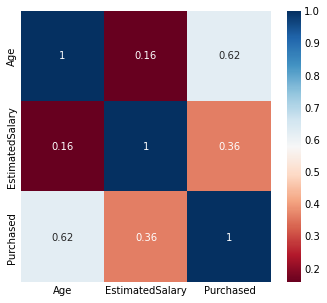

In [ ]:
# Display a heatmap plot

sns.heatmap(df_copy.corr(), cbar=True, annot=True, cmap='RdBu');

fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

Corrélation positive : 
- Age / Purchased

Corrélation négative : 
- Age / Estimated Salary

Il ne faut pas oublier que le sexe des personnes peut jouer dans l'analyse

**Analyse : Age / Purchased**

In [ ]:
sns.violinplot(data=df_copy, x='Purchased', y='Age')

fig = plt.gcf()
fig.set_size_inches(20,8)
plt.show()

In [ ]:
df_copy.groupby('Purchased')['Age'].mean()

#### Analysis : Age / Estimated Salary based on Purchased

In [ ]:
sns.scatterplot(data=df_copy, x='Age', y='EstimatedSalary', hue='Purchased');

fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show()

In [ ]:
df_copy.groupby('Purchased')['EstimatedSalary'].mean()

In [ ]:
# Déclaration de variables

le = preprocessing.LabelEncoder()

In [ ]:
# Vérification de présence de valeur null

file.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# Convertion des valeurs "string" en "int" de la colonne Spicies

var_encoded=le.fit_transform(file["Gender"])

df_var_encoded = pd.DataFrame({'Gender':np.array(var_encoded)})


# Création d'un DataFrame avec les valeurs de Species transformées

fl_encoded = file

# 1st Method

# fl_encoded = fl_encoded.drop(['CAT_STR'], axis=1)

# fl_encoded = fl_encoded.join(df_var_encoded) 

# 2nd Method

data_to_int = pd.DataFrame({'Gender':np.array(var_encoded)})
fl_encoded.update(data_to_int)

fl_encoded.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


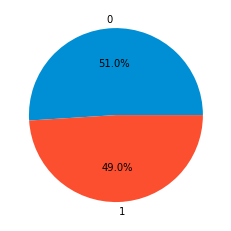

In [ ]:
# Affiche la répartition des resultats présents dans le DataFrame par catégorie

ax = file['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title('')
ax.set_ylabel('')
plt.show()

In [ ]:
sns.violinplot(data=df_copy, x='Purchased', y='Age', hue='Gender');

fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [ ]:
sns.countplot(data=df_buy, x='Gender', hue='Gender');
plt.title("Sexe selon achat")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

In [ ]:
# Affiche la moyenne de salaire estimé par sexe

fl = file.groupby('Gender')['EstimatedSalary'].mean()
clear_output()
print(fl)

Gender
0    71759.803922
1    67642.857143
Name: EstimatedSalary, dtype: float64


In [ ]:
# Affiche la moyenne d'âge par sexe

fl = file.groupby('Gender')['Age'].mean()
clear_output()
print(fl)

Gender
0    38.411765
1    36.867347
Name: Age, dtype: float64


In [ ]:
# Affiche la moyenne d'achat par âge

fl = file.groupby('Purchased')['Age'].mean()
clear_output()
print(fl)

Purchased
0    32.793774
1    46.391608
Name: Age, dtype: float64


In [ ]:
# Affiche la moyenne d'achat

fl = file['Purchased'].mean()
clear_output()
print((fl*100), str("%"))

35.75 %


In [ ]:
# Affiche la moyenne 0:F 1:H

fl = fl_encoded.groupby('Purchased')['Gender'].mean()
clear_output()
print(fl)


Purchased
0    0.505837
1    0.461538
Name: Gender, dtype: float64


In [ ]:
# Affiche le tableau des mesures max et min

fl_min = file['Age'].min()
fl_max = file['Age'].max()
clear_output()
print("Age Min",fl_min,"\n")
print("Age Max",fl_max)

Age Min 18 

Age Max 60


In [ ]:
# Affiche le tableau des mesures max et min

fl_min = file['EstimatedSalary'].min()
fl_max = file['EstimatedSalary'].max()
clear_output()
print("EstimatedSalary Min",fl_min,"\n")
print("EstimatedSalary Max",fl_max)

EstimatedSalary Min 15000 

EstimatedSalary Max 150000


________________________________
#### Major Conclusions about EDA

- Les femmes achètent plus que les hommes
- Le salaire moyen des acheteurs est de 86K
- La tranche d'âge est comprise entre 45 et 60 ans 
- ou un salaire débutant à 80K

____________________________________
____________________________________

<center><h2>Machine Learning</h2></center>

In [ ]:
# Séparation valeurs et resultats

feature_columns = ['Gender','Age','EstimatedSalary']
X = fl_encoded[feature_columns].values
y = fl_encoded['Purchased'].values

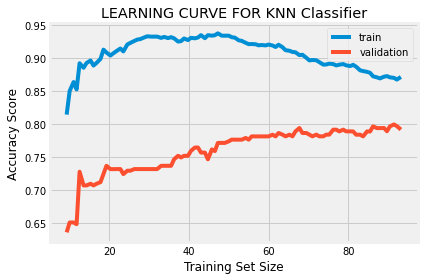

In [ ]:
# Affiche la meilleur répartition pour la découpe du jeu de données

model=KNeighborsClassifier()

N, train_score, val_score = learning_curve(model, X, y, train_sizes = np.linspace(0.1, 1, 100),  cv=5, scoring='accuracy')
plt.plot(N/X.shape[0]*100, train_score.mean(axis=1), label='train')
plt.plot(N/X.shape[0]*100, val_score.mean(axis=1), label='validation')
# clear_output()
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
# Séparation du jeu de données en deux

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.69, random_state=3)

In [ ]:
stand= StandardScaler()
fit_train= stand.fit_transform(X_train)
transfor_test=stand.transform(X_test)

In [ ]:
def best_setting():
  # Find the best cross-validation :
  knn = KNeighborsClassifier()
  kfold_score = loo_score = ss_score = stratkfold_score = []
  cv_result = {'K-Fold':0.0, 
              'Shuffle Split':0.0, 
              'Strat K-Fold':0.0, 
              'LOOCV': 0.0}

  k_range = range(1, 11)   # from 1 to 10 K-Nearest Neighbors
  print("For 1 to 10 KNN : ")

  # K-Fold
  cv = KFold()
  for k in k_range:
      score = cross_val_score(knn, fit_train, y_train, cv=cv, 
              scoring='accuracy').mean()
      kfold_score.append(score)
  cv_result['K-Fold'] = np.mean(kfold_score)
  print("    - K-Fold score max : ", max(kfold_score), "/ min :", 
      min(kfold_score))
  print("    - K-Fold mean score : ", np.mean(kfold_score))

  # Shuffle Split
  cv = ShuffleSplit(n_splits=5, train_size=0.8)
  for k in k_range:
      score = cross_val_score(knn, fit_train, y_train, cv=cv, 
              scoring='accuracy').mean()
      ss_score.append(score)
  cv_result['Shuffle Split'] = np.mean(ss_score)
  print("    - Shuffle Split score max : ", max(ss_score), 
      "/ min : ", min(ss_score))
  print("    - Shuffle Split mean score : ", np.mean(ss_score))

  # Stratified K-Fold
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
  for k in k_range:
      score = cross_val_score(knn, fit_train, y_train, cv=cv, 
              scoring='accuracy').mean()
      stratkfold_score.append(score)
  cv_result['Strat K-Fold'] = np.mean(stratkfold_score)
  print("    - Stratified K-Fold score max : ", max(stratkfold_score), 
      "/ min : ", min(stratkfold_score))
  print("    - Stratified K-Fold mean score : ", np.mean(stratkfold_score))

  # leave One Out
  cv = LeaveOneOut()
  for k in k_range:
      score = cross_val_score(knn, fit_train, y_train, cv=cv, 
              scoring='accuracy', n_jobs=-1).mean()
      loo_score.append(score)
  cv_result['LOOCV'] = np.mean(loo_score)
  print("    - LOOCV score max :", max(loo_score), "/ min : ", min(loo_score))
  print("    - LOOCV mean score : ", np.mean(loo_score))

  max_cv = max(cv_result, key=cv_result.get)
  print("\n Best choice to select :", max_cv)

In [ ]:
best_setting()

In [ ]:
def apply_par():
  if max_cv == 'K-Fold':
      cv = KFold() 
  elif max_cv == 'Shuffle Split':
      cv = ShuffleSplit(n_splits=5, train_size=0.8) 
  elif max_cv == 'Strat K-Fold':
      cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
  else:
      cv = LeaveOneOut()

In [ ]:
apply_par()

In [ ]:
def best_nei():
  params = {'n_neighbors': np.arange(1,41),
                'metric': ['euclidean', 'manhattan']}

  grid = GridSearchCV(knn, params, scoring='accuracy', cv=cv);
  grid.fit(fit_train, y_train);

In [ ]:
best_nei()

In [ ]:
# Features Selection - Varaince Threshold

selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

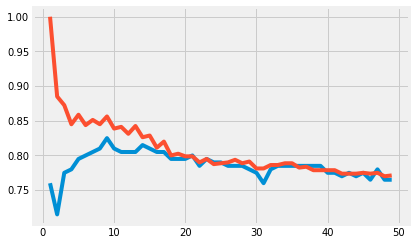

In [ ]:
# Affichage du graphique des scores selon le nombre de voisin

plt.plot(k, val_score.mean(axis=1))
plt.plot(k, train_score.mean(axis=1))
clear_output()

In [ ]:
# Affiche le meilleur score posible

grid.best_score_

0.8857142857142858

In [ ]:
# Affiche les meilleurs paramètres

grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

In [ ]:
# Test les paramètres sur le jeu de données test

model = grid.best_estimator_
model.score(transfor_test, y_test)

0.8708791208791209

In [ ]:
# Affiche la matrice de confusion

y_pred = model.predict(X_test)
confus_matrix = metrics.confusion_matrix(y_test, y_pred)
confus_matrix

array([[  0, 120],
       [  0,  56]])

In [ ]:
# Test de prédiction standardisé

model.fit(fit_train, y_train)
y_pred = model.predict(transfor_test)
print(y_pred)

[0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0]


In [ ]:
# Sauvegarde du modèle avec Pickle

d={}
d["model"]=model
d["stand"]=stand
d["le"]=le
f = open('fl.pkl', 'wb')
pickle.dump(d, f)
f.close()      